In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
cars=pd.read_csv('Data_Train1.csv')
cars.head()

Error: Jupyter cannot be started. Error attempting to locate jupyter: Data Science libraries jupyter and notebook are not installed in interpreter Python 3.6.1 32-bit.

In [2]:
BrandName = cars['Name'].apply(lambda x : x.split(' ')[0])
cars.insert(1,"Brand",BrandName)
cars.drop(['Name'],axis=1,inplace=True)
cars.head()

,Brand,Location,Location_name,Year,Kilometers_Driven,Fuel_Type,Fuel_Type_name,Transmission,Transmission_name,Owner_Type,Owner_Type_name,Mileage,Engine,Power,Seats,Price
0,Maruti,1,Mumbai,2010,72000,1,CNG,2,Manual,1,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,2,Pune,2015,41000,2,Diesel,2,Manual,1,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,3,Chennai,2011,46000,3,Petrol,2,Manual,1,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,3,Chennai,2012,87000,2,Diesel,2,Manual,1,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,4,Coimbatore,2013,40670,2,Diesel,1,Automatic,2,Second,15.20,1968.0,140.80,5.0,17.74


In [4]:
cars.Brand.unique()
cars.shape

(6019, 16)

C:\Users\Nitin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Nitin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


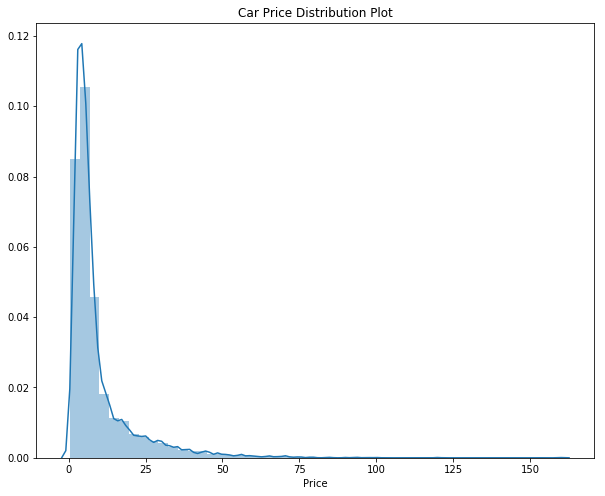

In [5]:
plt.figure(figsize=(10,8))
plt.title('Car Price Distribution Plot')
sns.distplot(cars.Price)
plt.show()

In [6]:
print(cars.Price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    6019.000000
mean        9.479468
std        11.187917
min         0.440000
25%         3.500000
50%         5.640000
75%         9.950000
85%        16.500000
90%        22.500000
100%      160.000000
max       160.000000
Name: Price, dtype: float64


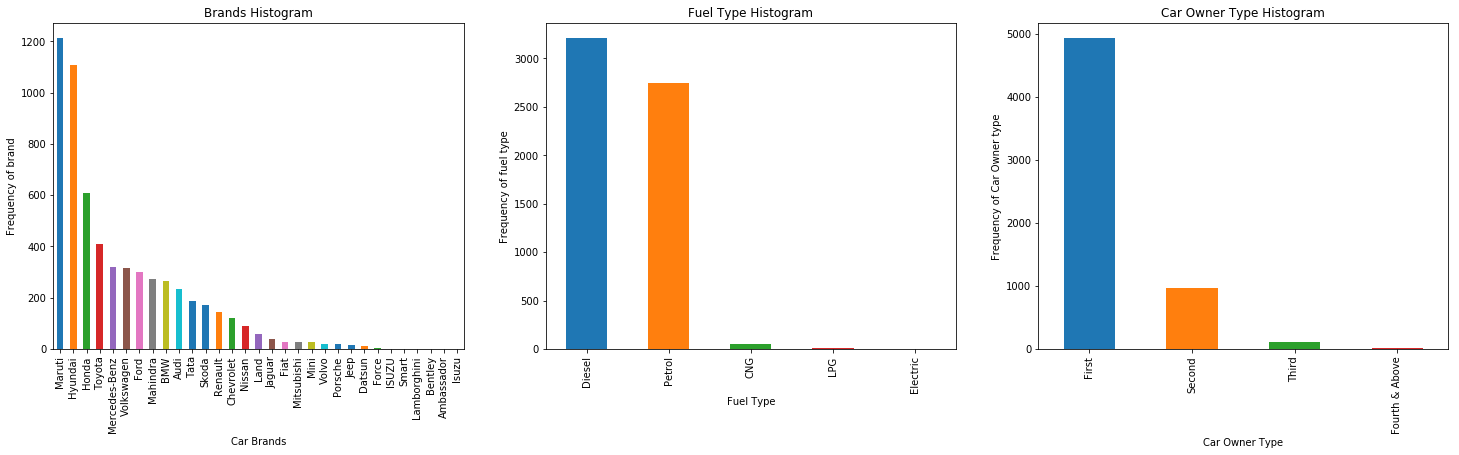

In [7]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cars.Brand.value_counts().plot('bar')
plt.title('Brands Histogram')
plt1.set(xlabel = 'Car Brands', ylabel='Frequency of brand')

plt.subplot(1,3,2)
plt1 = cars.Fuel_Type_name.value_counts().plot('bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = cars.Owner_Type_name.value_counts().plot('bar')
plt.title('Car Owner Type Histogram')
plt1.set(xlabel = 'Car Owner Type', ylabel='Frequency of Car Owner type')

plt.show()

<Figure size 720x576 with 0 Axes>

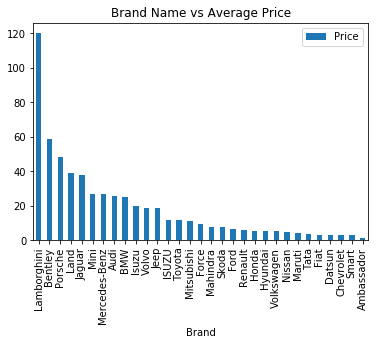

<Figure size 720x576 with 0 Axes>

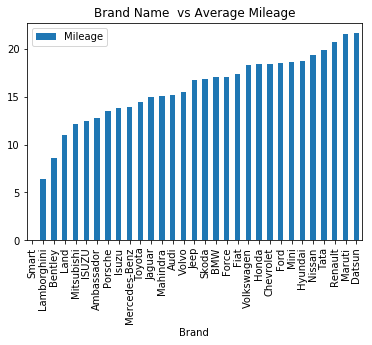

<Figure size 720x576 with 0 Axes>

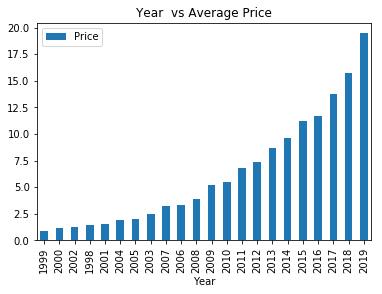

<Figure size 720x576 with 0 Axes>

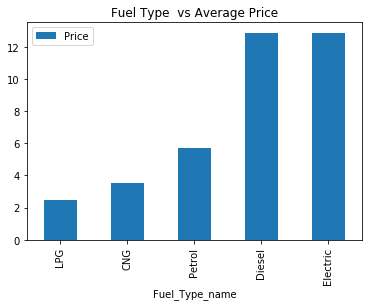

In [8]:
plt.figure(figsize=(10,8))
df = pd.DataFrame(cars.groupby(['Brand'])['Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Brand Name vs Average Price')
plt.show()

plt.figure(figsize=(10,8))
df = pd.DataFrame(cars.groupby(['Brand'])['Mileage'].mean().sort_values(ascending = True))
df.plot.bar()
plt.title('Brand Name  vs Average Mileage')
plt.show()

plt.figure(figsize=(10,8))
df = pd.DataFrame(cars.groupby(['Year'])['Price'].mean().sort_values(ascending = True))
df.plot.bar()
plt.title('Year  vs Average Price')
plt.show()

plt.figure(figsize=(10,8))
df = pd.DataFrame(cars.groupby(['Fuel_Type_name'])['Price'].mean().sort_values(ascending = True))
df.plot.bar()
plt.title('Fuel Type  vs Average Price')
plt.show()

In [9]:
cars.corr()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
Location,1.000000,0.046937,-0.041374,-0.036755,0.061535,-0.097814,0.067298,-0.024839,-0.019284,-0.016820,-0.016078
Year,0.046937,1.000000,-0.173048,-0.130269,-0.097059,-0.397152,0.321565,-0.052197,0.014525,0.012333,0.305327
Kilometers_Driven,-0.041374,-0.173048,1.000000,-0.098833,0.025663,0.085337,-0.065253,0.091068,0.033503,0.083113,-0.011493
Fuel_Type,-0.036755,-0.130269,-0.098833,1.000000,0.113006,0.041949,-0.164853,-0.382823,-0.252425,-0.286298,-0.289585
Transmission,0.061535,-0.097059,0.025663,0.113006,1.000000,0.008797,0.333235,-0.500381,-0.643737,0.075475,-0.586025
Owner_Type,-0.097814,-0.397152,0.085337,0.041949,0.008797,1.000000,-0.161181,0.050907,0.026088,0.014052,-0.097557
Mileage,0.067298,0.321565,-0.065253,-0.164853,0.333235,-0.161181,1.000000,-0.597699,-0.537729,-0.308226,-0.306593
Engine,-0.024839,-0.052197,0.091068,-0.382823,-0.500381,0.050907,-0.597699,1.000000,0.866185,0.393337,0.658354
Power,-0.019284,0.014525,0.033503,-0.252425,-0.643737,0.026088,-0.537729,0.866185,1.000000,0.101562,0.772566
Seats,-0.016820,0.012333,0.083113,-0.286298,0.075475,0.014052,-0.308226,0.393337,0.101562,1.000000,0.052225


In [11]:
#sns.pairplot(cars,diag_kind='kde')

In [13]:
x=cars.iloc[:,[1,3,4,5,7,9,11,12,13,14]].values
y=cars.iloc[:,-1].values


In [16]:
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
imputer=Imputer(missing_values='NaN',strategy='mean',axis=0)
imputer=imputer.fit(x[:,])
x[:,]=imputer.transform(x[:,])


In [17]:
import matplotlib.pyplot as mp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=6)

X_train,x_val,Y_train,y_val=train_test_split(x_train,y_train,test_size=.2,random_state=6)


In [18]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
X_train=sc.fit_transform(X_train)
x_val=sc.fit_transform(x_val)
x_test=sc.transform(x_test)

In [31]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

print("Train: ",regressor.score(X_train,Y_train))
print("\nTest: ",regressor.score(x_test,y_test))
print("\nValidation: ",regressor.score(x_val,y_val))
Linear={}
Linear['Training']=regressor.score(X_train,Y_train)*100
Linear['Testing']=regressor.score(x_test,y_test)*100
Linear['Validation']=regressor.score(x_val,y_val)*100

Train:  0.6998540087299517

Test:  0.7180222574095788

Validation:  0.6543759845947309


In [25]:
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures( degree = 2, include_bias = False) 
scaledXPolytrain = poly.fit_transform(x_train)
scaledXPolyval = poly.fit_transform(x_val)
scaledXPolytest = poly.transform(x_test)

In [26]:
regressorPoly = LinearRegression()
regressorPoly.fit(scaledXPolytrain, y_train)
print("Training Result")
print(regressorPoly.score(scaledXPolytrain, y_train))
print("\nTesting Result")
print(regressorPoly.score(scaledXPolytest, y_test))
print("\nValidation Result")
print(regressorPoly.score(scaledXPolyval, y_val))
Poly={}
Poly['Training']=regressorPoly.score(scaledXPolytrain, y_train)*100
Poly['Testing']=regressorPoly.score(scaledXPolytest, y_test)*100
Poly['Validation']=regressorPoly.score(scaledXPolyval, y_val)*100

Training Result
0.8522973807944595

Testing Result
0.816838793328353

Validation Result
0.8200799174924249


In [27]:
from sklearn.ensemble import RandomForestRegressor

regressorForest = RandomForestRegressor(n_estimators=20, random_state=0)
regressorForest.fit(x_train, y_train)
print("Training: ",regressorForest.score(x_train,y_train))
print("\nTesting: ",regressorForest.score(x_test,y_test))
print("\nValidation: ",regressorForest.score(x_val,y_val))
Random={}
Random['Training']=regressorForest.score(x_train,y_train)*100
Random['Testing']=regressorForest.score(x_test,y_test)*100
Random['Validation']=regressorForest.score(x_val,y_val)*100

C:\Users\Nitin\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Training:  0.9801942816882389

Testing:  0.8811364981711414

Validation:  0.9051418464901785


In [32]:
Linear

{'Training': 69.98540087299517,
 'Testing': 71.80222574095788,
 'Validation': 65.4375984594731}

In [29]:
Poly

{'Training': 85.22973807944595,
 'Testing': 81.68387933283529,
 'Validation': 82.00799174924249}

In [30]:
Random

{'Training': 98.01942816882388,
 'Testing': 88.11364981711414,
 'Validation': 90.51418464901785}